<a href="https://colab.research.google.com/github/Algozakhar/deep_learning/blob/main/1%D0%9DMipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
all_data = pd.read_csv('FHM_baze/forest_dataset.csv')
all_data.head(15)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2
5,2878,7,11,417,47,2355,207,218,148,2571,...,0,0,0,0,0,0,0,0,0,2
6,2995,144,8,324,77,2523,232,239,138,1711,...,1,0,0,0,0,0,0,0,0,2
7,3158,143,28,480,81,1061,247,221,84,2234,...,0,0,0,0,0,0,0,0,0,1
8,2911,315,8,67,4,3522,198,233,175,2407,...,0,0,0,0,0,0,0,0,0,2
9,2968,212,10,42,3,5413,211,250,173,2213,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
all_data.shape

(10000, 55)

In [ ]:
labels = all_data[all_data.columns[-1]].values
labels

array([2, 1, 2, ..., 2, 2, 2])

In [ ]:
feature_matrix = all_data[all_data.columns[0:-1]].values
feature_matrix

array([[2683,  333,   35, ...,    0,    0,    0],
       [2915,   90,    8, ...,    0,    0,    0],
       [2941,  162,    7, ...,    0,    0,    0],
       ...,
       [2693,   21,   11, ...,    0,    0,    0],
       [2536,   42,   11, ...,    0,    0,    0],
       [3109,  261,   10, ...,    0,    0,    0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = KNeighborsClassifier(1)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(y_pred, test_labels)

0.7855

-  Переберите по сетке от 1 до 10 параметр числа соседей

-  Также вы попробуйте использоввать различные метрики: ['manhattan', 'euclidean']

-  Попробуйте использовать различные стратегии вычисления весов: [‘uniform’, ‘distance’]

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
cl = KNeighborsClassifier()
params = { 'n_neighbors': np.arange(1,10),
           'metric': ['manhattan', 'euclidean'],
           'weights': ['uniform', 'distance']
         }

In [ ]:
cl_grid = GridSearchCV(cl, params, n_jobs =-1, cv =5, refit=True, scoring='accuracy')

In [ ]:
cl_grid.fit(feature_matrix, labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
cl_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
clf_best = KNeighborsClassifier(4, weights = 'distance', metric = 'manhattan')
clf_best.fit(train_feature_matrix, train_labels)
best_prob = clf_best.predict(test_feature_matrix)
probe = accuracy_score(test_labels, best_prob)
print(probe)

0.805


In [ ]:
#@title Текст заголовка по умолчанию
pred_prob = clf_best.predict_proba(test_feature_matrix)

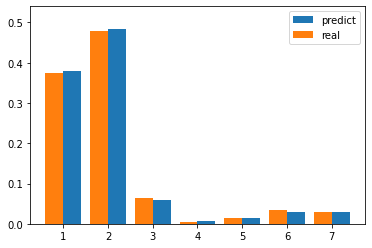

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
unique, freq = np.unique(test_labels, return_counts = True)
freq = list(map(lambda x:x/len(test_labels),freq))
pred_freq = pred_prob.mean(axis = 0)
plt.bar(range(1,8),pred_freq, width=0.4, align = 'edge',label='predict')
plt.bar(range(1,8),freq, width=-0.4, align='edge', label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()